In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn. linear_model import LogisticRegression
from sklearn. discriminant_analysis import LinearDiscriminantAnalysis
from sklearn. discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn. naive_bayes import GaussianNB
from sklearn. neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score

In [2]:
sns.set_theme(style = 'darkgrid')

In [3]:
Dados = pd.read_csv('Dados\\Futebol.csv')

X = Dados.drop('target', axis = 'columns')

Y = Dados[['target']]

In [4]:
X_Treino, Y_Treino = X.iloc [ : 2560] , Y.iloc [ : 2560]

X_Teste, Y_Teste = X.iloc [2560 : ] , Y.iloc [2560 : ]

In [5]:
X_Treino = X_Treino.drop(['home_team', 'away_team'], axis = 'columns')

X_Teste = X_Teste.drop(['home_team', 'away_team'], axis = 'columns')

In [6]:
Y_Treino = np.array(Y_Treino).reshape((-1))

Y_Teste = np.array(Y_Teste).reshape((-1))

In [7]:
X_Treino = StandardScaler().fit_transform(X_Treino)

X_Teste = StandardScaler().fit_transform(X_Teste)

In [8]:
LR = LogisticRegression()

LR.fit(X = X_Treino, y = Y_Treino)

accuracy_score(Y_Treino, LR.predict(X_Treino))

Treino = [accuracy_score(Y_Treino, LR.predict(X_Treino))]

Teste = [accuracy_score(Y_Teste, LR.predict(X_Teste))]

Estimador = ['LR']

In [9]:
LDA = LinearDiscriminantAnalysis()

LDA.fit(X = X_Treino, y = Y_Treino)

Treino += [accuracy_score(Y_Treino, LDA.predict(X_Treino))]

Teste += [accuracy_score(Y_Teste, LDA.predict(X_Teste))]

Estimador += ['LDA']

In [10]:
QDA = QuadraticDiscriminantAnalysis()

QDA.fit(X = X_Treino, y = Y_Treino)

Treino += [accuracy_score(Y_Treino, QDA.predict(X_Treino))]

Teste += [accuracy_score(Y_Teste, QDA.predict(X_Teste))]

Estimador += ['QDA']

In [11]:
NB = GaussianNB()

NB.fit(X = X_Treino, y = Y_Treino)

Treino += [accuracy_score(Y_Treino, NB.predict(X_Treino))]

Teste += [accuracy_score(Y_Teste, NB.predict(X_Teste))]

Estimador += ['NB']

In [12]:
KNN = KNeighborsClassifier(n_neighbors = 5)

KNN.fit(X = X_Treino, y = Y_Treino)

Treino += [accuracy_score(Y_Treino, KNN.predict(X_Treino))]

Teste += [accuracy_score(Y_Teste, KNN.predict(X_Teste))]

Estimador += ['KNN']

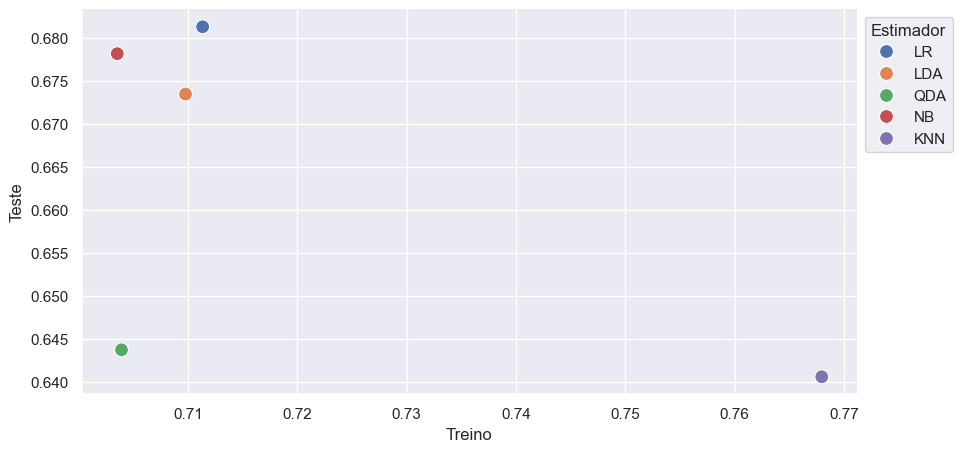

In [13]:
Erro = pd.DataFrame(

    {

        'Treino': Treino, 
        
        'Teste': Teste, 
        
        'Estimador': Estimador

    }

)

plt.figure(figsize = (10, 5))

Grafico = sns.scatterplot(

    data = Erro, 
    
    x = 'Treino', y = 'Teste', 
    
    hue = 'Estimador', s = 100

)

Grafico.spines['right'].set_visible(False)

Grafico.spines['top'].set_visible(False)

sns.move_legend(Grafico, 'upper left', bbox_to_anchor = (1, 1))

plt.show()

In [14]:
Treino = []

Teste = []

Estimador = []

for K in np.arange(1, 10 + 1):

    KNN = KNeighborsClassifier(n_neighbors = K)

    KNN.fit(X_Treino, Y_Treino)

    Treino += [accuracy_score(Y_Treino, KNN.predict(X_Treino))]

    Teste += [accuracy_score(Y_Teste, KNN.predict(X_Teste))]

    Estimador += [f'{K}']

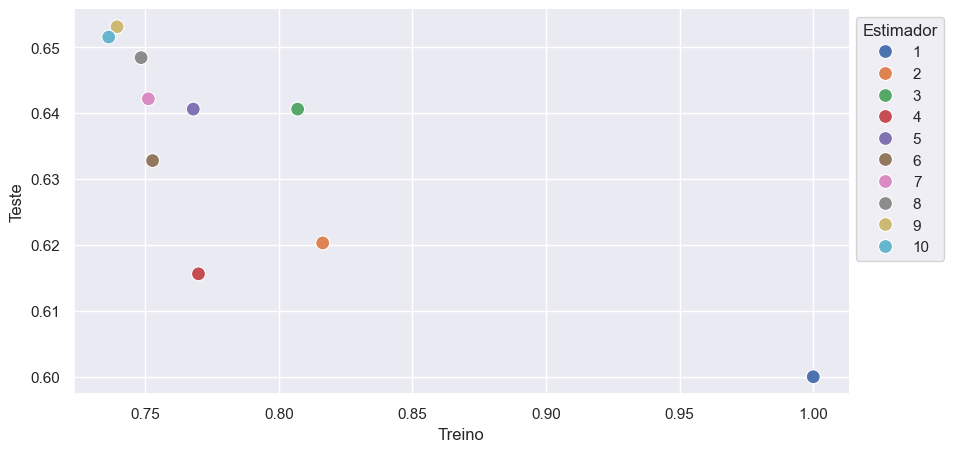

In [15]:
Erro = pd.DataFrame(

    {

        'Treino': Treino, 
        
        'Teste': Teste, 
        
        'Estimador': Estimador

    }

)

plt.figure(figsize = (10, 5))

Grafico = sns.scatterplot(

    data = Erro, 
    
    x = 'Treino', y = 'Teste', 
    
    hue = 'Estimador', s = 100
)

Grafico.spines['right'].set_visible(False)

Grafico.spines['top'].set_visible(False)

sns.move_legend(Grafico, 'upper left', bbox_to_anchor = (1, 1))

plt.show()